In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60, test_size=140)
print(X_train.shape)
print(y_train.shape)
true_coefficient

(60, 30)
(60,)


array([ 0.        ,  0.        ,  2.12227127,  0.        ,  0.        ,
       49.25507875,  0.        ,  0.        ,  0.        , 15.07583458,
        0.        ,  0.        , 32.29058037,  0.        ,  0.        ,
        8.41487791,  0.        ,  0.        ,  0.        , 64.56924673,
        0.        ,  0.        ,  0.        , 70.85764943,  0.        ,
       34.28961765, 88.17735659,  0.        , 80.81291382,  0.        ])

In [5]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
print(f"score train={linear_regression.score(X_train,y_train):.2f}")
print(f"score train={linear_regression.score(X_test,y_test):.2f}")

score train=0.88
score train=0.22


In [9]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.5985284495875146


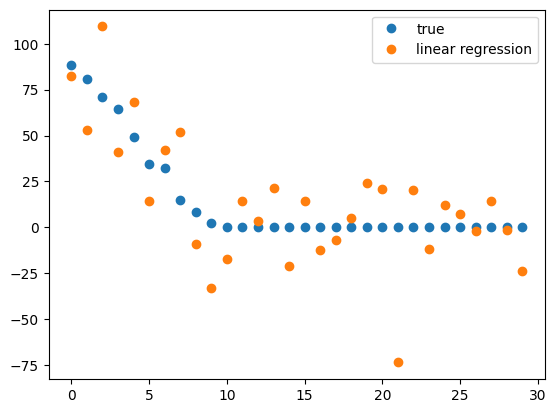

In [12]:
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="linear regression")

plt.legend()

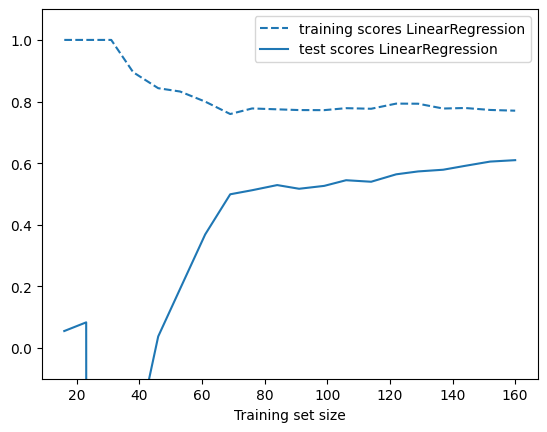

In [13]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()    
plot_learning_curve(LinearRegression(), X, y)